In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [ ]:
df, info = tfds.load( 'svhn_cropped', as_supervised=True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/svhn_cropped/3.0.0.incomplete95R2B1/svhn_cropped-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/svhn_cropped/3.0.0.incomplete95R2B1/svhn_cropped-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/svhn_cropped/3.0.0.incomplete95R2B1/svhn_cropped-extra.tfrecord


Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


In [ ]:
df

{'extra': <DatasetV1Adapter shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>,
 'test': <DatasetV1Adapter shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>}

In [ ]:
train_data = df['extra']
valid_data = df['train']
test_data = df['test']

In [ ]:
def preprocess (image, labels):
  image = tf.cast(image, tf.float32)
  image /= 255.
  return image, labels

In [ ]:
batch_size = 300

train_data = train_data.map(preprocess).batch(batch_size).prefetch(1)
valid_data = valid_data.map(preprocess).batch(batch_size).prefetch(1)
test_data = test_data.map(preprocess).batch(batch_size).prefetch(1)

**MODEL**

In [ ]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers


model = Sequential([
                    Conv2D(32, 3, padding='same',  activation='relu',kernel_initializer='he_uniform', input_shape = [32, 32, 3]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(10, activation = 'softmax'),
                    ])

In [ ]:
model.compile(optimizer= optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit( train_data, epochs = 100, callbacks = [early_stopping_cb],validation_data = (valid_data))


Epoch 1/100
1771/1771 [==============================] - 145s 82ms/step - loss: 0.8430 - accuracy: 0.7622 - val_loss: 0.6833 - val_accuracy: 0.8041
Epoch 2/100
1771/1771 [==============================] - 142s 80ms/step - loss: 0.3343 - accuracy: 0.9130 - val_loss: 0.5862 - val_accuracy: 0.8371
Epoch 3/100
1771/1771 [==============================] - 144s 82ms/step - loss: 0.2839 - accuracy: 0.9265 - val_loss: 0.5426 - val_accuracy: 0.8513
Epoch 4/100
1771/1771 [==============================] - 145s 82ms/step - loss: 0.2560 - accuracy: 0.9339 - val_loss: 0.5158 - val_accuracy: 0.8600
Epoch 5/100
1771/1771 [==============================] - 145s 82ms/step - loss: 0.2353 - accuracy: 0.9391 - val_loss: 0.4936 - val_accuracy: 0.8655
Epoch 6/100
1771/1771 [==============================] - 144s 81ms/step - loss: 0.2181 - accuracy: 0.9435 - val_loss: 0.4738 - val_accuracy: 0.8706
Epoch 7/100
1771/1771 [==============================] - 143s 81ms/step - loss: 0.2030 - accuracy: 0.9470 - val_

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

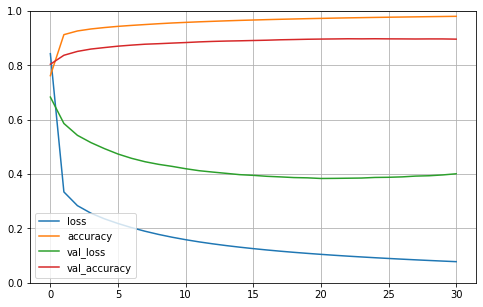

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]

plt.show()

In [ ]:
model.evaluate(test_data)

87/87 [==============================] - 6s 66ms/step - loss: 0.3544 - accuracy: 0.9155


[0.3544033467769623, 0.9154502153396606]